In [1]:
#Phase 1:Data Acquisition and Preparation
#importing all the modules
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt # <--- NEW: Import the datetime library

In [15]:
# Define the tickers (assets) and the time frame for analysis
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN'] # <-- Remember to update this list if needed!

# Define the end date as yesterday
end_date = dt.date.today() - dt.timedelta(days=1)

# Define the start date as 10 years prior to the end date
# start_date = end_date - dt.timedelta(days=10*365) (use this when needed)
start_date = dt.date(2015, 1, 1)

# Download the 'Adj Close' price (best for financial analysis)
# FIX: Setting auto_adjust=False restores the expected multi-level column structure
stock_data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)
closing_prices = stock_data['Adj Close']

print("--- Data Acquisition Complete ---")
print(closing_prices.head()) 



[*********************100%***********************]  4 of 4 completed

--- Data Acquisition Complete ---
Ticker           AAPL     AMZN      GOOGL       MSFT
Date                                                
2015-01-02  24.237553  15.4260  26.296135  39.858459
2015-01-05  23.554745  15.1095  25.795088  39.491924
2015-01-06  23.556967  14.7645  25.158480  38.912289
2015-01-07  23.887278  14.9210  25.084490  39.406696
2015-01-08  24.805082  15.0230  25.171890  40.565956


In [13]:
# Calculate the daily returns (essential foundation for risk/return analysis)
daily_returns = closing_prices.pct_change().dropna()

print("\n--- Calculated Daily Returns (First 5 Days) ---")
print(daily_returns.head())


--- Calculated Daily Returns (First 5 Days) ---
Ticker          AAPL      AMZN     GOOGL      MSFT
Date                                              
2015-12-07 -0.006301 -0.004178 -0.007982 -0.001789
2015-12-08 -0.000423  0.011197  0.002781 -0.000359
2015-12-09 -0.022076 -0.018514 -0.016242 -0.014519
2015-12-10  0.004757 -0.003715 -0.003292  0.005275
2015-12-11 -0.025738 -0.033473 -0.012657 -0.021893


In [8]:
print("--- Last 5 Closing Prices ---")
print(closing_prices.tail())
print("-" * 35)

print("\n--- Last 5 Daily Returns ---")
print(daily_returns.tail())

--- Last 5 Closing Prices ---
Ticker            AAPL        AMZN       GOOGL        MSFT
Date                                                      
2025-11-21  271.489990  220.690002  299.660004  472.119995
2025-11-24  275.920013  226.279999  318.579987  474.000000
2025-11-25  276.970001  229.669998  323.440002  476.989990
2025-11-26  277.549988  229.160004  319.950012  485.500000
2025-11-28  278.850006  233.220001  320.179993  492.010010
-----------------------------------

--- Last 5 Daily Returns ---
Ticker          AAPL      AMZN     GOOGL      MSFT
Date                                              
2025-11-21  0.019681  0.016349  0.035274 -0.013189
2025-11-24  0.016317  0.025330  0.063138  0.003982
2025-11-25  0.003805  0.014981  0.015255  0.006308
2025-11-26  0.002094 -0.002221 -0.010790  0.017841
2025-11-28  0.004684  0.017717  0.000719  0.013409


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2511 entries, 2015-12-04 to 2025-11-28
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AAPL)   2511 non-null   float64
 1   (Adj Close, AMZN)   2511 non-null   float64
 2   (Adj Close, GOOGL)  2511 non-null   float64
 3   (Adj Close, MSFT)   2511 non-null   float64
 4   (Close, AAPL)       2511 non-null   float64
 5   (Close, AMZN)       2511 non-null   float64
 6   (Close, GOOGL)      2511 non-null   float64
 7   (Close, MSFT)       2511 non-null   float64
 8   (High, AAPL)        2511 non-null   float64
 9   (High, AMZN)        2511 non-null   float64
 10  (High, GOOGL)       2511 non-null   float64
 11  (High, MSFT)        2511 non-null   float64
 12  (Low, AAPL)         2511 non-null   float64
 13  (Low, AMZN)         2511 non-null   float64
 14  (Low, GOOGL)        2511 non-null   float64
 15  (Low, MSFT)         2511 non-null   f

In [9]:
data.isnull().sum()

Price      Ticker
Adj Close  AAPL      0
           AMZN      0
           GOOGL     0
           MSFT      0
Close      AAPL      0
           AMZN      0
           GOOGL     0
           MSFT      0
High       AAPL      0
           AMZN      0
           GOOGL     0
           MSFT      0
Low        AAPL      0
           AMZN      0
           GOOGL     0
           MSFT      0
Open       AAPL      0
           AMZN      0
           GOOGL     0
           MSFT      0
Volume     AAPL      0
           AMZN      0
           GOOGL     0
           MSFT      0
dtype: int64

In [19]:
#Phase 2: Statistical Analysis: The goal of Phase 2 was to convert the daily data into the annualized metrics required for portfolio theory.

# Assuming 252 trading days in a year for annualization

# 1. Calculate Annualized Average Returns
# This is the expected return for each stock over a year
annual_returns = daily_returns.mean() * 252

print("--- Annualized Average Returns ---")
print(annual_returns)
print("-" * 35)

--- Annualized Average Returns ---
Ticker
AAPL     0.277460
AMZN     0.248514
GOOGL    0.253830
MSFT     0.267617
dtype: float64
-----------------------------------


In [17]:
# 2. Calculate Annualized Covariance Matrix
# This matrix is the basis for calculating portfolio risk (volatility)
annual_cov_matrix = daily_returns.cov() * 252

print("\n--- Annualized Covariance Matrix ---")
print(annual_cov_matrix)
print("-" * 35)

# Get the number of assets for the next step (critical for the simulation loop)
num_assets = len(tickers)


--- Annualized Covariance Matrix ---
Ticker      AAPL      AMZN     GOOGL      MSFT
Ticker                                        
AAPL    0.084812  0.055027  0.051355  0.052987
AMZN    0.055027  0.108292  0.060633  0.058840
GOOGL   0.051355  0.060633  0.083158  0.054751
MSFT    0.052987  0.058840  0.054751  0.071730
-----------------------------------


In [ ]:
#now we have critical inputs: annual_returns and annual_cov_matrix based on 10 years of history.

In [20]:
#Phase 3: Monte Carlo Simulation
 """ Step 1: """
#Define the simulation function.

# Assuming a Risk-Free Rate of 0% for simplicity in the Sharpe Ratio calculation
risk_free_rate = 0.00 

def calculate_portfolio_metrics(weights, annual_returns, annual_cov_matrix, risk_free_rate):
    """
    Calculates the key performance metrics (Return, Volatility, Sharpe) 
    for a portfolio given asset weights.
    """
    # Ensures weights are in the correct format (a numpy array)
    weights = np.array(weights)
    
    # 1. Portfolio Annual Return: Sum of (Individual Asset Return * Asset Weight)
    port_return = np.sum(annual_returns * weights)
    
    # 2. Portfolio Annual Volatility (Risk): sqrt(weights^T * Covariance Matrix * weights)
    # The term inside the sqrt calculates the portfolio variance.
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(annual_cov_matrix, weights)))
    
    # 3. Sharpe Ratio: (Portfolio Return - Risk-Free Rate) / Portfolio Volatility
    sharpe_ratio = (port_return - risk_free_rate) / port_volatility
    
    return port_return, port_volatility, sharpe_ratio

print("Portfolio calculation function defined successfully.")

Portfolio calculation function defined successfully.


In [25]:
""" Step 2 """
# Define how many random portfolios we want to generate
num_portfolios = 500000

# Initialize empty lists to store the results of all 50,000 simulations
all_port_returns = []
all_port_volatility = []
all_port_sharpe = []
all_port_weights = []

# Now, we loop through the defined number of portfolios
for i in range(num_portfolios):
    # 1. Generate random weights for the assets
    weights = np.random.random(num_assets)
    
    # 2. Normalize the weights: make them sum exactly to 1 (critical for portfolio allocation)
    weights /= np.sum(weights)

    # 3. Call the function from Step 1 to calculate the metrics for this portfolio
    port_return, port_volatility, sharpe_ratio = calculate_portfolio_metrics(
        weights, annual_returns, annual_cov_matrix, risk_free_rate
    )
    
    # 4. Store the results in our lists
    all_port_returns.append(port_return)
    all_port_volatility.append(port_volatility)
    all_port_sharpe.append(sharpe_ratio)
    all_port_weights.append(weights)

print(f"--- Completed {num_portfolios} Monte Carlo Simulations! ---")

--- Completed 500000 Monte Carlo Simulations! ---



--- OPTIMAL PORTFOLIO (Maximum Sharpe Ratio) ---
Return          0.268714
Volatility      0.249310
Sharpe Ratio    1.077832
AAPL            0.363499
MSFT            0.002957
GOOGL           0.175852
AMZN            0.457692
Name: 126322, dtype: float64


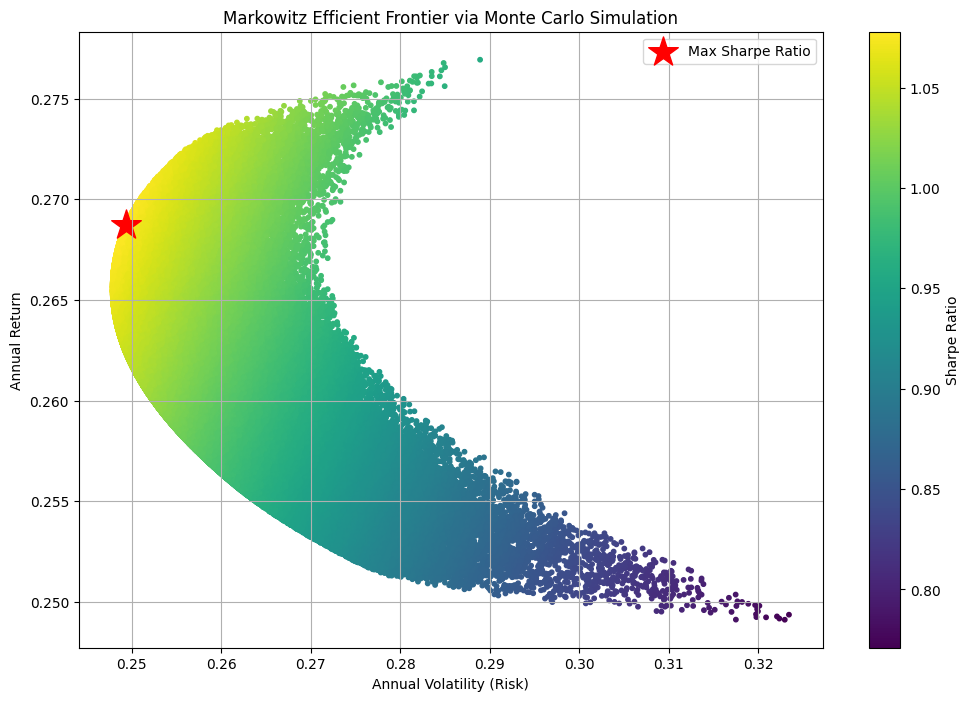

In [24]:
#Phase 4: Optimization and Visualization

# Consolidate all simulation results into a DataFrame for easy analysis
portfolio_results = pd.DataFrame({
    'Return': all_port_returns,
    'Volatility': all_port_volatility,
    'Sharpe Ratio': all_port_sharpe
})

# Add the individual asset weights to the DataFrame
for j, ticker in enumerate(tickers):
    # 'w' represents a list of weights (one for each of the 50k portfolios)
    portfolio_results[ticker] = [w[j] for w in all_port_weights]

# Find the optimal portfolio (the one with the highest Sharpe Ratio)
max_sharpe_portfolio = portfolio_results.loc[portfolio_results['Sharpe Ratio'].idxmax()]

print("\n--- OPTIMAL PORTFOLIO (Maximum Sharpe Ratio) ---")
print(max_sharpe_portfolio)

# Plot the Efficient Frontier and the Optimal Portfolio
plt.figure(figsize=(12, 8))

# Plot all 50,000 random portfolios (scatter plot)
# The color of the dot is based on the Sharpe Ratio
plt.scatter(portfolio_results['Volatility'], portfolio_results['Return'], 
            c=portfolio_results['Sharpe Ratio'], cmap='viridis', s=10)
plt.colorbar(label='Sharpe Ratio')

# Highlight the Maximum Sharpe Portfolio (Optimal Portfolio)
plt.scatter(max_sharpe_portfolio['Volatility'], 
            max_sharpe_portfolio['Return'], 
            color='red', marker='*', s=500, label='Max Sharpe Ratio')

plt.title('Markowitz Efficient Frontier via Monte Carlo Simulation')
plt.xlabel('Annual Volatility (Risk)')
plt.ylabel('Annual Return')
plt.legend(labelspacing=0.8)
plt.grid(True)
plt.show()